In [81]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [82]:
# Load data from CSV files
baker_data = pd.read_csv("../Cornell_Energy_Raw/BakerLab.csv")
baker_data

,name,slottime_GMT,slottype,slotavg,pointTitle
0,BakerLab.CW.FP/TONS,2016-01-01 00:00:00,H,15.218050,Chilled Water
1,BakerLab.Elec.North.PowerScout3/kW_System,2016-01-01 00:00:00,H,155.650000,North Electric
2,BakerLab.Elec.South.PowerScout3/kW_System,2016-01-01 00:00:00,H,100.575000,South Electric
3,BakerLab.STM.Flow,2016-01-01 00:00:00,H,3.078228,Steam
4,BakerLab.CW.FP/TONS,2016-01-01 01:00:00,H,15.561300,Chilled Water
...,...,...,...,...,...
137651,BakerLab.STM.Flow,2019-12-31 22:00:00,H,3.259005,Steam
137652,BakerLab.CW.FP/TONS,2019-12-31 23:00:00,H,15.123000,Chilled Water
137653,BakerLab.Elec.North.PowerScout3/kW_System,2019-12-31 23:00:00,H,138.525000,North Electric
137654,BakerLab.Elec.South.PowerScout3/kW_System,2019-12-31 23:00:00,H,87.300000,South Electric


In [83]:
filt_chilled_water = baker_data['pointTitle'] == 'Chilled Water'

In [84]:
frame_chilled_water = baker_data[filt_chilled_water]
frame_chilled_water.reset_index(inplace=True)
frame_chilled_water = frame_chilled_water.drop('index', axis=1)

In [85]:
frame_chilled_water['slottime_GMT'] = pd.to_datetime(frame_chilled_water['slottime_GMT'], format='%Y-%m-%d %H:%M:%S')

In [86]:
frame_chilled_water = frame_chilled_water.set_index('slottime_GMT')

In [87]:
frame_chilled_water = frame_chilled_water.reindex(pd.date_range(start='1/1/2016', end='1/1/2020', freq='H'), index='slottime_GMT', fill_value=None)

In [88]:
frame_chilled_water['slotavg'] = frame_chilled_water['slotavg'].interpolate(method="linear")

([<matplotlib.axis.XTick at 0x158052b20>,
 [Text(16953.0, 0, '2016'),
  Text(17318.0, 0, '2017'),
  Text(17683.0, 0, '2018'),
  Text(18048.0, 0, '2019')])

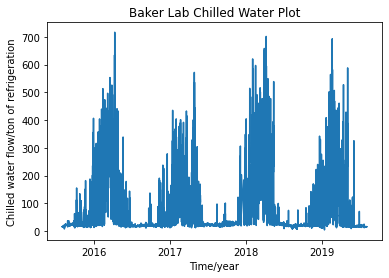

In [89]:
slottime = frame_chilled_water.index
slotavg = frame_chilled_water.slotavg
plt.title('Baker Lab Chilled Water Plot')
plt.xlabel('Time/year')
plt.ylabel('Chilled water flow/ton of refrigeration')
plt.plot(slottime, slotavg)
plt.xticks(ticks=['2016-06-01 00:00:00','2017-06-01 00:00:00','2018-06-01 00:00:00','2019-06-01 00:00:00'], labels=['2016', '2017', '2018', '2019'])

In [90]:
filt_north_elec = baker_data['pointTitle'] == 'North Electric'

In [91]:
frame_north_elec = baker_data[filt_north_elec]
frame_north_elec.reset_index(inplace=True)

In [92]:
filt_south_elec = baker_data['pointTitle'] == 'South Electric'

In [93]:
frame_south_elec = baker_data[filt_south_elec]
frame_south_elec.reset_index(inplace=True)

In [94]:
sum_elec = np.array(frame_south_elec['slotavg']) + np.array(frame_north_elec['slotavg'])

In [95]:
elec = {'name': ['BakeLab.Elec.Sum']*len(np.array(frame_south_elec['name'])), 'slottime_GMT': frame_south_elec['slottime_GMT'], 'slottype': frame_south_elec['slottype'], 'slotavg': sum_elec, 'pointTitle': ['Sum Electric']*len(np.array(frame_south_elec['pointTitle']))}

In [96]:
frame_elec = pd.DataFrame(data=elec)

In [97]:
frame_elec['slottime_GMT'] = pd.to_datetime(frame_elec['slottime_GMT'], format='%Y-%m-%d %H:%M:%S')

In [98]:
frame_elec = frame_elec.set_index('slottime_GMT')

In [99]:
frame_elec = frame_elec.reindex(pd.date_range(start='1/1/2016', end='1/1/2020', freq='H'), index='slottime_GMT', fill_value=None)

In [100]:
frame_elec['slotavg'] = frame_elec['slotavg'].interpolate(method="linear")

([<matplotlib.axis.XTick at 0x1580c5100>,
 [Text(16953.0, 0, '2016'),
  Text(17318.0, 0, '2017'),
  Text(17683.0, 0, '2018'),
  Text(18048.0, 0, '2019')])

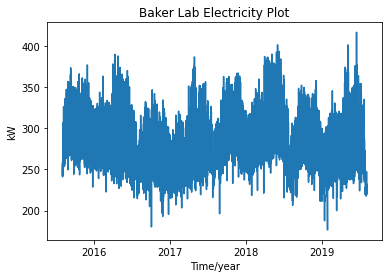

In [101]:
slottime = frame_elec.index
slotavg = frame_elec.slotavg
plt.title('Baker Lab Electricity Plot')
plt.xlabel('Time/year')
plt.ylabel('kW')
plt.plot(slottime, slotavg)
plt.xticks(ticks=['2016-06-01 00:00:00','2017-06-01 00:00:00','2018-06-01 00:00:00','2019-06-01 00:00:00'], labels=['2016', '2017', '2018', '2019'])

In [102]:
filt_steam = baker_data['pointTitle'] == 'Steam'
frame_steam = baker_data[filt_steam]
frame_steam.reset_index(inplace=True)

In [103]:
frame_steam = frame_steam.drop('index', axis=1)
frame_steam['slottime_GMT'] = pd.to_datetime(frame_steam['slottime_GMT'], format='%Y-%m-%d %H:%M:%S')
frame_steam = frame_steam.set_index('slottime_GMT')
frame_steam = frame_steam.reindex(pd.date_range(start='1/1/2016', end='1/1/2020', freq='H'), index='slottime_GMT', fill_value=None)
frame_steam['slotavg'] = frame_steam['slotavg'].interpolate(method="linear")
frame_steam['slotavg'] *= 3530

([<matplotlib.axis.XTick at 0x107f33520>,
 [Text(16953.0, 0, '2016'),
  Text(17318.0, 0, '2017'),
  Text(17683.0, 0, '2018'),
  Text(18048.0, 0, '2019')])

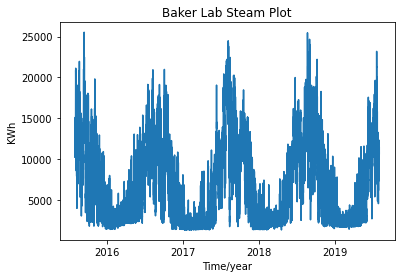

In [104]:
slottime = frame_steam.index
slotavg = frame_steam.slotavg
plt.title('Baker Lab Steam Plot')
plt.xlabel('Time/year')
plt.ylabel('KWh')
plt.plot(slottime, slotavg)
plt.xticks(ticks=['2016-06-01 00:00:00','2017-06-01 00:00:00','2018-06-01 00:00:00','2019-06-01 00:00:00'], labels=['2016', '2017', '2018', '2019'])

In [105]:
frame_steam.slotavg.sum()

237164809.40578485

In [106]:
frame_elec_month = frame_elec.index.month
frame_elec_month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12,  1],
           dtype='int64', length=35065)

In [107]:
frame_elec_hour = frame_elec.index.hour
frame_elec_hour

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            ...
            15, 16, 17, 18, 19, 20, 21, 22, 23,  0],
           dtype='int64', length=35065)

In [108]:
frame_elec_day = frame_elec.index.day
frame_elec_day

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            31, 31, 31, 31, 31, 31, 31, 31, 31,  1],
           dtype='int64', length=35065)

In [109]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

In [110]:
cal = calendar()
holidays = cal.holidays(start=frame_elec.index.min(), end=frame_elec.index.max())

In [111]:
holidays

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-15', '2016-05-30',
               '2016-07-04', '2016-09-05', '2016-10-10', '2016-11-11',
               '2016-11-24', '2016-12-26', '2017-01-02', '2017-01-16',
               '2017-02-20', '2017-05-29', '2017-07-04', '2017-09-04',
               '2017-10-09', '2017-11-10', '2017-11-23', '2017-12-25',
               '2018-01-01', '2018-01-15', '2018-02-19', '2018-05-28',
               '2018-07-04', '2018-09-03', '2018-10-08', '2018-11-12',
               '2018-11-22', '2018-12-25', '2019-01-01', '2019-01-21',
               '2019-02-18', '2019-05-27', '2019-07-04', '2019-09-02',
               '2019-10-14', '2019-11-11', '2019-11-28', '2019-12-25',
               '2020-01-01'],
              dtype='datetime64[ns]', freq=None)

In [112]:
winter_break_16_start = pd.date_range('01/01/2016', '01/25/2016', freq='D')
winter_break_16_end = pd.date_range('12/17/2016', '12/31/2016', freq='D')
winter_break_17_start = pd.date_range('01/01/2017', '01/24/2017', freq='D')
winter_break_17_end = pd.date_range('12/20/2017', '12/31/2017', freq='D')
winter_break_18_start = pd.date_range('01/01/2018', '02/01/2018', freq='D')
winter_break_18_end = pd.date_range('12/20/2018', '12/31/2018', freq='D')
winter_break_19_start = pd.date_range('01/01/2019', '02/01/2019', freq='D')
winter_break_19_end = pd.date_range('12/20/2019', '12/31/2019', freq='D')
winter_breaks = winter_break_16_start.union(winter_break_16_end).union(winter_break_17_start).union(winter_break_18_start).union(winter_break_18_end).union(winter_break_19_start).union(winter_break_19_end)

In [113]:
fall_break_16 = pd.date_range('10/08/2016', '10/11/2016', freq='D')
fall_break_17 = pd.date_range('10/07/2017', '10/10/2017', freq='D')
fall_break_18 = pd.date_range('10/06/2018', '10/09/2018', freq='D')
fall_break_19 = pd.date_range('10/12/2019', '10/15/2019', freq='D')
fall_breaks = fall_break_16.union(fall_break_17).union(fall_break_18).union(fall_break_19)

In [114]:
thx_giving_16 = pd.date_range('11/23/2016', '11/27/2016', freq='D')
thx_giving_17 = pd.date_range('11/22/2017', '11/26/2017', freq='D')
thx_giving_18 = pd.date_range('11/21/2018', '11/25/2018', freq='D')
thx_giving_19 = pd.date_range('11/27/2019', '12/01/2019', freq='D')
thx_givings = thx_giving_16.union(thx_giving_17).union(thx_giving_18).union(thx_giving_19)

In [115]:
feb_break_16 = pd.date_range('02/13/2016', '02/16/2016', freq='D')
feb_break_17 = pd.date_range('02/18/2017', '02/21/2017', freq='D')
feb_break_18 = pd.date_range('02/17/2018', '02/20/2018', freq='D')
feb_break_19 = pd.date_range('02/23/2019', '02/26/2019', freq='D')
feb_breaks = feb_break_16.union(feb_break_17).union(feb_break_18).union(feb_break_19)

In [116]:
sp_break_16 = pd.date_range('03/26/2016', '04/03/2016', freq='D')
sp_break_17 = pd.date_range('04/01/2017', '04/09/2017', freq='D')
sp_break_18 = pd.date_range('03/31/2018', '04/08/2018', freq='D')
sp_break_19 = pd.date_range('03/30/2019', '04/07/2019', freq='D')
sp_breaks = sp_break_16.union(sp_break_17).union(sp_break_18).union(sp_break_19)

In [117]:
from pandas.tseries.holiday import AbstractHolidayCalendar, nearest_workday, Holiday, USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

class CornellHolidayCalendar(AbstractHolidayCalendar):
    """
    Cornell University Holiday Calendar based on Cornell University academic calendars
    """
    rules = [fall_breaks, thx_givings, winter_breaks, feb_breaks, sp_breaks]

In [118]:
cornell_holiday_calendar = CustomBusinessDay(holidays=[*sp_breaks, *winter_breaks, *feb_breaks, *fall_breaks, *thx_givings])

In [119]:
cornell_holiday_calendar

<CustomBusinessDay>

In [120]:
cornell_workdays_series = pd.date_range(start="01/01/2016", end="12/31/2019", freq=cornell_holiday_calendar).to_series()

In [121]:
cornell_workdays_series

2016-01-26   2016-01-26
2016-01-27   2016-01-27
2016-01-28   2016-01-28
2016-01-29   2016-01-29
2016-02-01   2016-02-01
                ...    
2019-12-13   2019-12-13
2019-12-16   2019-12-16
2019-12-17   2019-12-17
2019-12-18   2019-12-18
2019-12-19   2019-12-19
Freq: C, Length: 887, dtype: datetime64[ns]

In [122]:
cornell_workdays = cornell_workdays_series.dt.day_of_week

In [123]:
cornell_workdays

2016-01-26    1
2016-01-27    2
2016-01-28    3
2016-01-29    4
2016-02-01    0
             ..
2019-12-13    4
2019-12-16    0
2019-12-17    1
2019-12-18    2
2019-12-19    3
Freq: C, Length: 887, dtype: int64

In [124]:
def build_cornell_calendar(input_workdays):
    weekdays = []
    for date in pd.date_range('01/01/2016', '12/31/2019', freq='D'):
        if date not in input_workdays:
            if date.day_of_week == 5 or date.day_of_week == 6:
                weekdays.append(24*[date.day_of_week+1])
            else:
                weekdays.append(24*[8])
        else:
            weekdays.append(24*[input_workdays[date]+1])
    return weekdays

In [125]:
cornell_calender = build_cornell_calendar(cornell_workdays)

In [126]:
whole_cornell_calender = flatten_list = [j for sub in cornell_calender for j in sub]

In [127]:
len(whole_cornell_calender)

35064

In [128]:
Month = pd.date_range(start='1/1/2016', end='1/1/2020', freq='H').month

In [129]:
Hour = pd.date_range(start='1/1/2016', end='1/1/2020', freq='H').hour

In [130]:
daylight_saving_16 = pd.date_range(start="03/13/2016", end="11/06/2016", freq='D')
daylight_saving_17 = pd.date_range(start="03/12/2017", end="11/05/2017", freq='D')
daylight_saving_18 = pd.date_range(start="03/11/2018", end="11/04/2018", freq='D')
daylight_saving_19 = pd.date_range(start="03/10/2019", end="11/03/2019", freq='D')

In [131]:
year_16 = pd.date_range(start="01/01/2016", end="12/31/2016", freq='D')
year_17 = pd.date_range(start="01/01/2017", end="12/31/2017", freq='D')
year_18 = pd.date_range(start="01/01/2018", end="12/31/2018", freq='D')
year_19 = pd.date_range(start="01/01/2019", end="12/31/2019", freq='D')

In [132]:
def build_daylight_saving_flag(daylight_saving_year, year):
    res = []
    for day in year:
        if day in daylight_saving_year:
            res.append(24*[1])
        else:
            res.append(24*[0])
    return res

In [133]:
daylight_saving_f16 = build_daylight_saving_flag(daylight_saving_16, year_16)
daylight_saving_f17 = build_daylight_saving_flag(daylight_saving_17, year_17)
daylight_saving_f18 = build_daylight_saving_flag(daylight_saving_18, year_18)
daylight_saving_f19 = build_daylight_saving_flag(daylight_saving_19, year_19)

In [134]:
len(daylight_saving_f16)

366

In [135]:
build1_data = pd.read_csv("../Climate_Zone_5/Building_1.csv")
build1_data

,Month,Hour,Day Type,Daylight Savings Status,Indoor Temperature [C],Average Unmet Cooling Setpoint Difference [C],Indoor Relative Humidity [%],Equipment Electric Power [kWh],DHW Heating [kWh],Cooling Load [kWh]
0,1,1,8.0,0.0,18.93,0.0,77.92,9.80,0.0,0.0
1,1,2,8.0,0.0,18.82,0.0,77.97,10.41,0.0,0.0
2,1,3,8.0,0.0,18.76,0.0,77.89,10.39,0.0,0.0
3,1,4,8.0,0.0,18.66,0.0,77.74,10.33,0.0,0.0
4,1,5,8.0,0.0,18.62,0.0,77.37,9.41,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
35035,12,20,1.0,0.0,19.87,0.0,40.65,9.28,0.0,0.0
35036,12,21,1.0,0.0,19.68,0.0,40.04,9.28,0.0,0.0
35037,12,22,1.0,0.0,19.47,0.0,39.47,9.28,0.0,0.0
35038,12,23,1.0,0.0,19.26,0.0,39.17,9.28,0.0,0.0


In [136]:
indoor_temp = build1_data['Indoor Temperature [C]']
relative_humidity = build1_data['Indoor Relative Humidity [%]']
avg_unmet_cooling_setpnt_diff = build1_data['Average Unmet Cooling Setpoint Difference [C]']

In [137]:
whole_date = pd.date_range(start='01/01/2016', end='01/01/2020', freq='H')

In [138]:
indoor_temp = np.array(indoor_temp)
relative_humidity = np.array(relative_humidity)
avg_unmet_cooling_setpnt_diff = np.array(avg_unmet_cooling_setpnt_diff)

In [139]:
len(whole_date)

35065

In [140]:
building_thermal = {'indoor temperature': indoor_temp, 'indoor relative humidity': relative_humidity, 'avg unmet cooling setpnt diff': avg_unmet_cooling_setpnt_diff}

In [141]:
df_build_therm = pd.DataFrame(data=building_thermal, index=pd.date_range(start='1/1/2016', end='2019-12-30 23:00', freq='H'))

In [142]:
df_build_therm

,indoor temperature,indoor relative humidity,avg unmet cooling setpnt diff
2016-01-01 00:00:00,18.93,77.92,0.0
2016-01-01 01:00:00,18.82,77.97,0.0
2016-01-01 02:00:00,18.76,77.89,0.0
2016-01-01 03:00:00,18.66,77.74,0.0
2016-01-01 04:00:00,18.62,77.37,0.0
...,...,...,...
2019-12-30 19:00:00,19.87,40.65,0.0
2019-12-30 20:00:00,19.68,40.04,0.0
2019-12-30 21:00:00,19.47,39.47,0.0
2019-12-30 22:00:00,19.26,39.17,0.0


In [143]:
new_df_build_therm = df_build_therm.reindex(index=pd.date_range(start='1/1/2016', end='1/1/2020', freq='H'), fill_value=None)

In [144]:
new_df_build_therm = new_df_build_therm.interpolate()

In [145]:
new_df_build_therm

,indoor temperature,indoor relative humidity,avg unmet cooling setpnt diff
2016-01-01 00:00:00,18.93,77.92,0.0
2016-01-01 01:00:00,18.82,77.97,0.0
2016-01-01 02:00:00,18.76,77.89,0.0
2016-01-01 03:00:00,18.66,77.74,0.0
2016-01-01 04:00:00,18.62,77.37,0.0
...,...,...,...
2019-12-31 20:00:00,19.06,38.40,0.0
2019-12-31 21:00:00,19.06,38.40,0.0
2019-12-31 22:00:00,19.06,38.40,0.0
2019-12-31 23:00:00,19.06,38.40,0.0


In [146]:
Month = np.array(Month[:-1])

In [147]:
Hour = np.array(Hour[:-1])

In [148]:
Day_Type = pd.Series(whole_cornell_calender)

In [149]:
daylight_saving_f1617 = np.append(daylight_saving_f16, daylight_saving_f17)

In [150]:
daylight_saving_f1819 = np.append(daylight_saving_f18, daylight_saving_f19)

In [151]:
Daylight_Savings_Status = np.append(daylight_saving_f1617, daylight_saving_f1819)

In [152]:
Indoor_Temperature = new_df_build_therm['indoor temperature']

In [153]:
Average_Unmet_Cooling_Setpoint_Difference = new_df_build_therm['avg unmet cooling setpnt diff']

In [154]:
Indoor_Relative_Humidity = new_df_build_therm['indoor relative humidity']

In [155]:
Equipment_Electric_Power = frame_elec.slotavg[:-1]

In [156]:
DHW_Heating = frame_steam.slotavg[:-1]/7.5

In [157]:
Cooling_Load = frame_chilled_water.slotavg[:-1]* 3.51685

In [158]:
BakerLab_DataFrame = {"Month": Month, "Hour": Hour, "Day Type": Day_Type, "Daylight Savings Status": Daylight_Savings_Status, "Indoor Temperature [C]": Indoor_Temperature[:-1].values, "Average Unmet Cooling Setpoint Difference [C]": Average_Unmet_Cooling_Setpoint_Difference[:-1].values, "Indoor Relative Humidity [%]": Indoor_Relative_Humidity[:-1].values, "Equipment Electric Power [kWh]": Equipment_Electric_Power.values, "DHW Heating [kWh]": DHW_Heating.values, "Cooling Load [kWh]": Cooling_Load.values}

In [159]:
BakerLab_DataFrame = pd.DataFrame(BakerLab_DataFrame)
BakerLab_DataFrame.fillna(0.)

,Month,Hour,Day Type,Daylight Savings Status,Indoor Temperature [C],Average Unmet Cooling Setpoint Difference [C],Indoor Relative Humidity [%],Equipment Electric Power [kWh],DHW Heating [kWh],Cooling Load [kWh]
0,1,0,8,0,18.93,0.0,77.92,256.225,1448.819077,53.519599
1,1,1,8,0,18.82,0.0,77.97,252.825,1385.089633,54.726758
2,1,2,8,0,18.76,0.0,77.89,249.650,1478.705233,55.000193
3,1,3,8,0,18.66,0.0,77.74,247.500,1366.978380,53.429304
4,1,4,8,0,18.62,0.0,77.37,252.625,1460.242157,53.627127
...,...,...,...,...,...,...,...,...,...,...
35059,12,19,8,0,19.06,0.0,38.40,223.275,1212.109043,53.780725
35060,12,20,8,0,19.06,0.0,38.40,229.250,1235.909480,53.552482
35061,12,21,8,0,19.06,0.0,38.40,232.200,1292.314173,53.082455
35062,12,22,8,0,19.06,0.0,38.40,230.225,1533.905020,52.446960


In [160]:
BakerLab_DataFrame.to_csv("processed/BakerLab.csv", index=False)